Assignment #1: Perform a basic statistical analysis of the time DOT 311 (table is called dot_311) complaints are open (subtract closed date from created date). Connect to the database to get the data and do the analysis.

In [492]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from datetime import timedelta

import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')

In [495]:
cursor = conn.cursor()
statement = "SELECT * FROM information_schema.columns WHERE table_name= 'dot_311'"
cursor.execute(statement)
column_names = []
for row in cursor.fetchall():
    column_names.append(row[3])
print(column_names)

['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor', 'location t', 'incident z', 'incident a', 'street nam', 'cross stre', 'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city', 'landmark', 'facility t', 'status', 'due date', 'resolution', 'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina', 'park facil', 'park borou', 'school nam', 'school num', 'school reg', 'school cod', 'school pho', 'school add', 'school cit', 'school sta', 'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa', 'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2', 'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude', 'location', 'geom', 'created_date', 'closed_date']


In [239]:
statement = "SELECT complaint, agency, created_date, closed_date FROM dot_311"
cursor.execute(statement)
complaint_data = []
for row in cursor:
    complaint_data.append(row)

In [352]:
df = pd.DataFrame(complaint_data)
df.columns = ['complaint', 'agency', 'created_date', 'closed_date']
df.head(3)

,complaint,agency,created_date,closed_date
0,Traffic Signal Condition,DOT,2016-02-01 00:12:00,2016-02-01 01:15:00
1,Traffic Signal Condition,DOT,2016-02-01 00:14:00,2016-02-01 00:54:00
2,Traffic Signal Condition,DOT,2016-02-01 00:15:00,2016-02-01 01:30:00


In [353]:
pd.value_counts(df['complaint'].values, sort=True)

Street Light Condition        2040
Street Condition              1916
Traffic Signal Condition       808
Broken Muni Meter              525
Sidewalk Condition             106
Highway Condition               90
Street Sign - Damaged           83
Street Sign - Missing           67
Street Sign - Dangling          55
DOT Literature Request          53
Broken Parking Meter            32
Curb Condition                  21
Bridge Condition                18
Ferry Inquiry                   13
Bus Stop Shelter Placement       7
Ferry Complaint                  7
Highway Sign - Damaged           4
Municipal Parking Facility       3
Public Toilet                    2
Parking Card                     1
dtype: int64

The most frequent complaints were for street light, street, and traffic signal conditions. 

In [465]:
date1 = df['closed_date']
date2 = df['created_date']
timeopen = date1 - date2
df1 = pd.DataFrame(timeopen)
df1.columns = ['Time Taken']
df1.describe()

,Time Taken
count,5650
mean,6 days 15:05:05.589380
std,14 days 12:05:38.260805
min,-19 days +09:29:00
25%,0 days 01:14:00
50%,0 days 21:48:15
75%,4 days 00:30:48.500000
max,89 days 18:54:00


In [375]:
print("The smallest time taken to respond to a noise complaint was, miraculously: " + str(c.min()))
print("The longest amount of time was: " + str(df1['Time Taken'].max()))
print("The average time was: " + str(df1['Time Taken'].mean()))

The smallest time taken to respond to a noise complaint was, miraculously: -19 days +09:29:00
The longest amount of time was: 89 days 18:54:00
The average time was: 6 days 15:05:05.589380


In [496]:
df2 = pd.concat([df, df1], axis=1)
df2.columns = ['Complaint', 'Agency', 'Created Date', 'Closed Date', 'Time Taken']
df3 = bdf[pd.notnull(df2['Time Taken'])]
df3.sort_values(by='Time Taken', ascending=False).head(3)

,Complaint,Agency,Created Date,Closed Date,Time Taken
1743,Street Light Condition,DOT,2016-02-02 16:08:00,2016-05-02 11:02:00,89 days 18:54:00
3665,Street Light Condition,DOT,2016-02-04 12:43:00,2016-05-02 10:28:00,87 days 21:45:00
1349,Sidewalk Condition,DOT,2016-02-02 11:13:28,2016-04-28 17:21:59,86 days 06:08:31


In [471]:
timeopen.astype('timedelta64[h]')
a = (timeopen / pd.Timedelta(hours=1)).dropna()
plottable_dates = pd.DataFrame(a)
plottable_dates.describe()

,0
count,5650.000000
mean,159.084886
std,348.093961
min,-446.516667
25%,1.233333
50%,21.804167
75%,96.513472
max,2154.900000


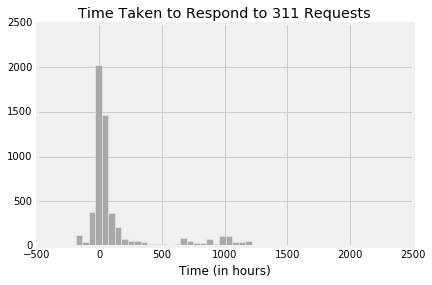

In [489]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,)
n, bins, patches = ax.hist(plottable_dates, bins=50, range=(-450, 2155), histtype='bar')

for patch in patches:
    patch.set_facecolor('darkgrey')

plt.title('Time Taken to Respond to 311 Requests')
plt.xlabel('Time (in hours)')